In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log10

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 5)

# Bruteforce

In [18]:
df = pd.read_csv("bruteforce/bruteforce.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:10].median(), axis=1)

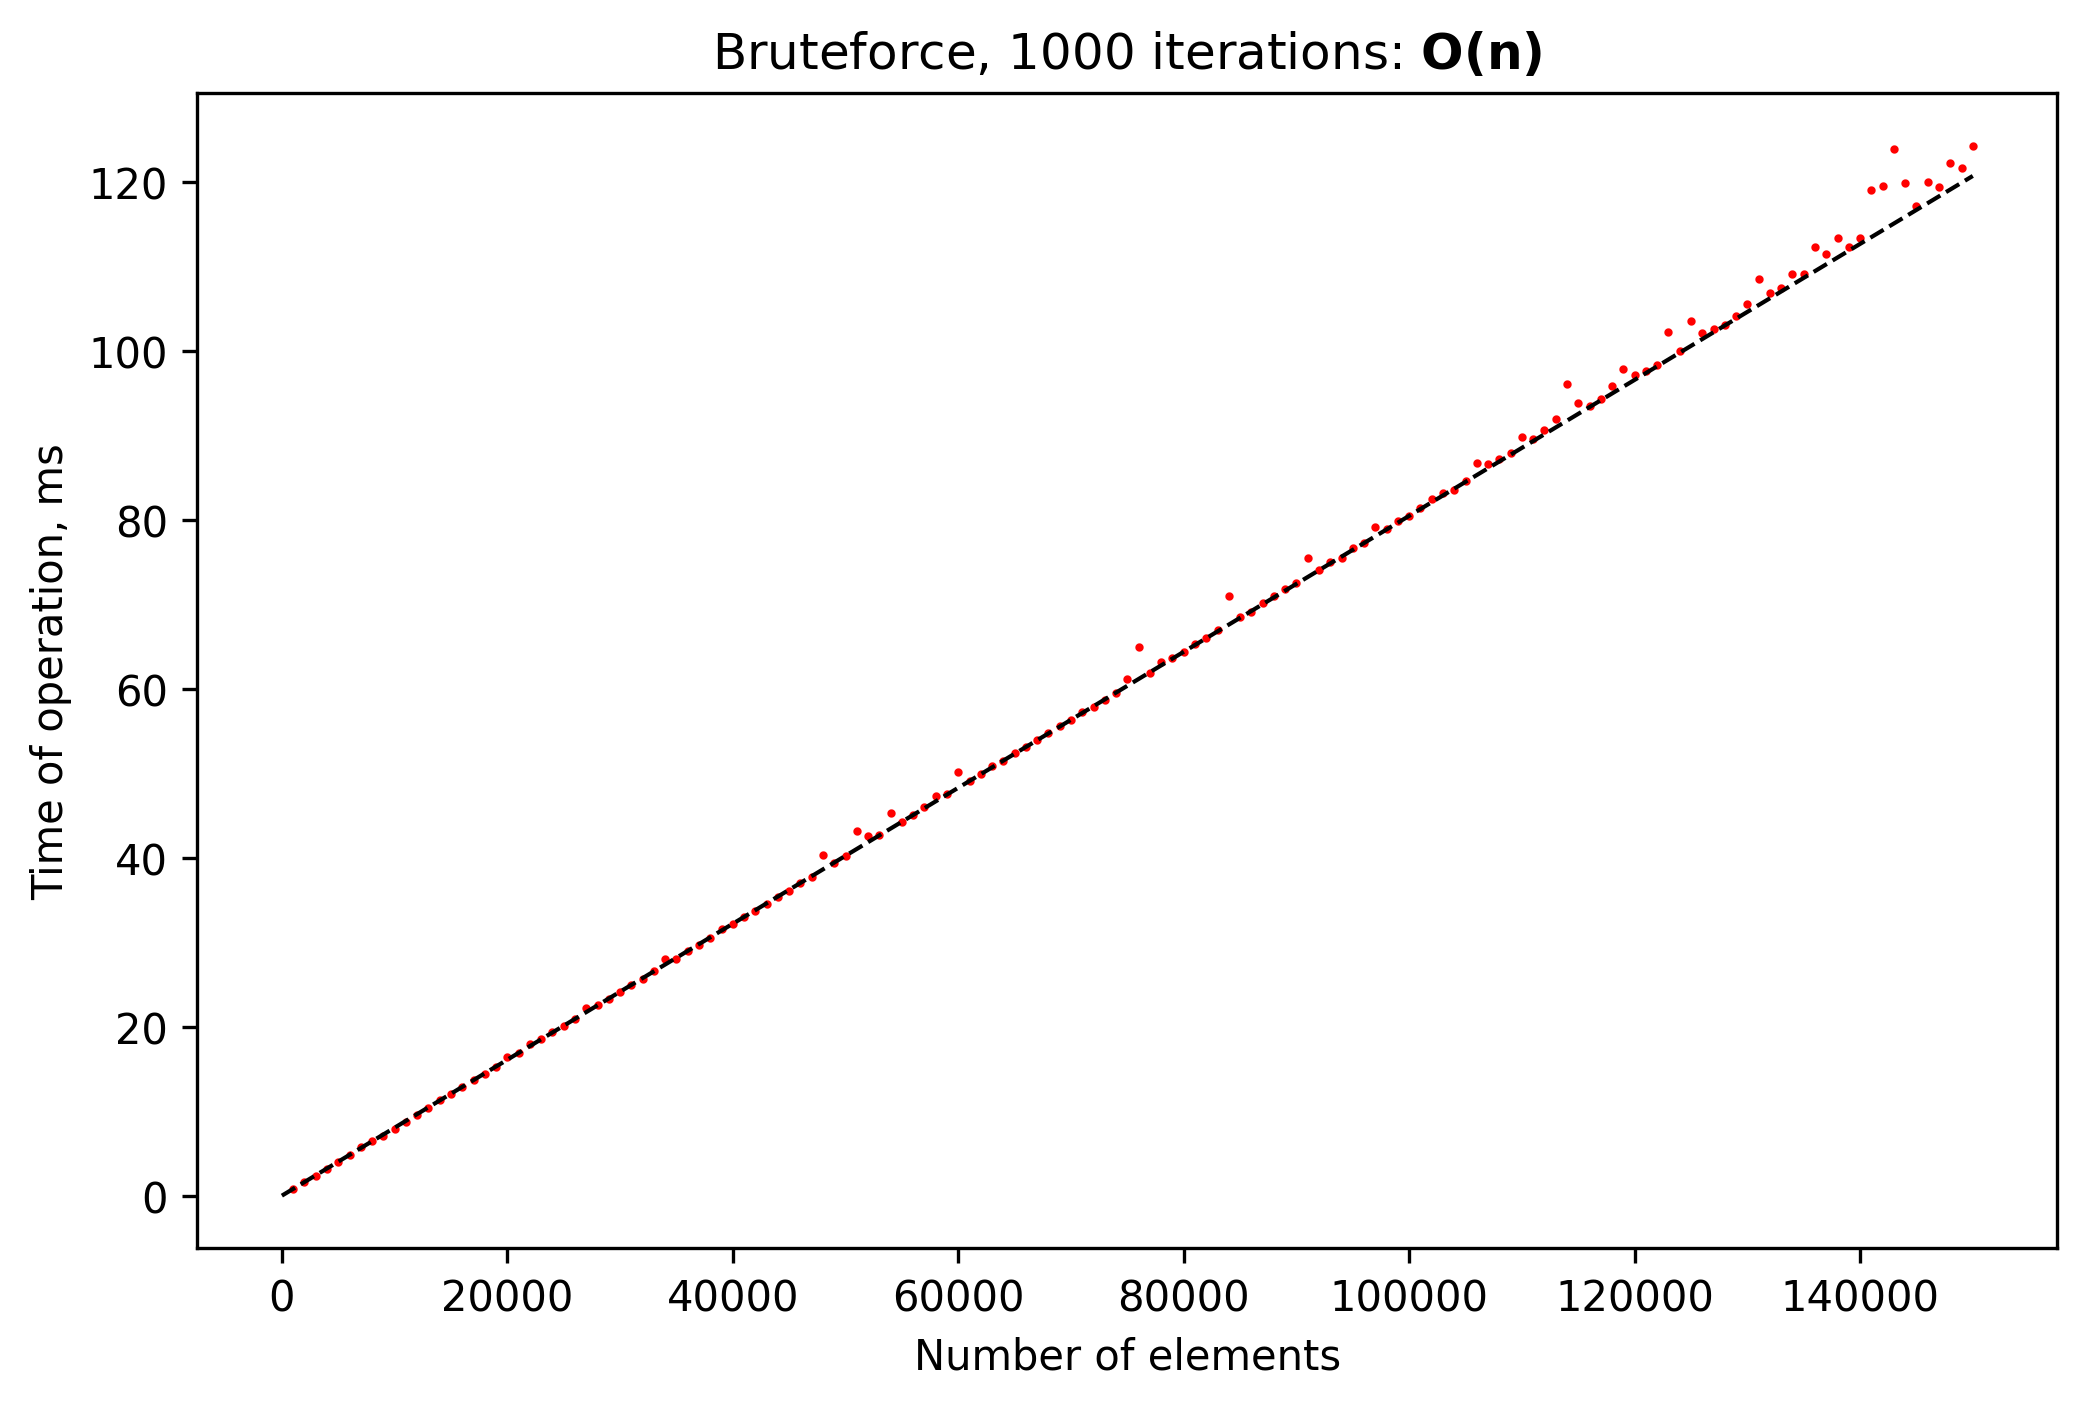

In [22]:
ls = np.linspace(0, 150000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time']/1000, 'or', ms=1)
plt.title('Bruteforce, 1000 iterations: $\mathbf{O(n)}$')
k=80.5e-5
plt.plot(ls, k*ls, '--k', lw=1)

# Binary search

In [5]:
df = pd.read_csv("bisearch/bisearch.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:100].median(), axis=1)
df

,size,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time92,time93,time94,time95,time96,time97,time98,time99,time100,time
0,1,1247,1224,1230,1230,1231,1230,1231,1209,1175,...,1175,1244,1201,1194,1176,1175,1175,1177,1176,1176.0
1,2,2222,2263,2349,2248,2264,2263,2253,2270,2251,...,2251,2374,2273,2229,2312,2297,2273,2360,2336,2260.0
2,3,2228,2201,2215,2197,2255,2310,2320,2251,2328,...,2301,2187,2280,2231,2198,2228,2206,2210,2197,2251.0
3,4,2945,3138,3035,3129,3048,3107,3089,3215,3269,...,3087,3082,2969,3009,3042,3162,3041,3080,3287,3122.0
4,5,3100,3639,2904,2985,2980,2955,3195,3028,3044,...,3119,3237,3066,3009,3046,3033,3061,3075,3105,3066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,454823,19961,20071,20028,19997,20090,19982,20063,20125,20032,...,19793,20114,20165,19905,20058,20188,19850,19991,21444,20114.0
65,545788,23209,23942,23536,21011,20951,23361,23392,25135,24994,...,20837,20696,20871,20922,20870,21201,20849,20867,23279,21260.0
66,654946,23404,23546,23713,23791,23608,26283,23631,22625,23605,...,25221,25572,23725,25652,25402,25564,25374,21051,23756,23616.0
67,785936,23584,24435,24687,24539,24298,23994,24278,24925,21271,...,24020,22256,23707,23821,24074,23479,25600,25506,23637,24116.0


In [15]:
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)

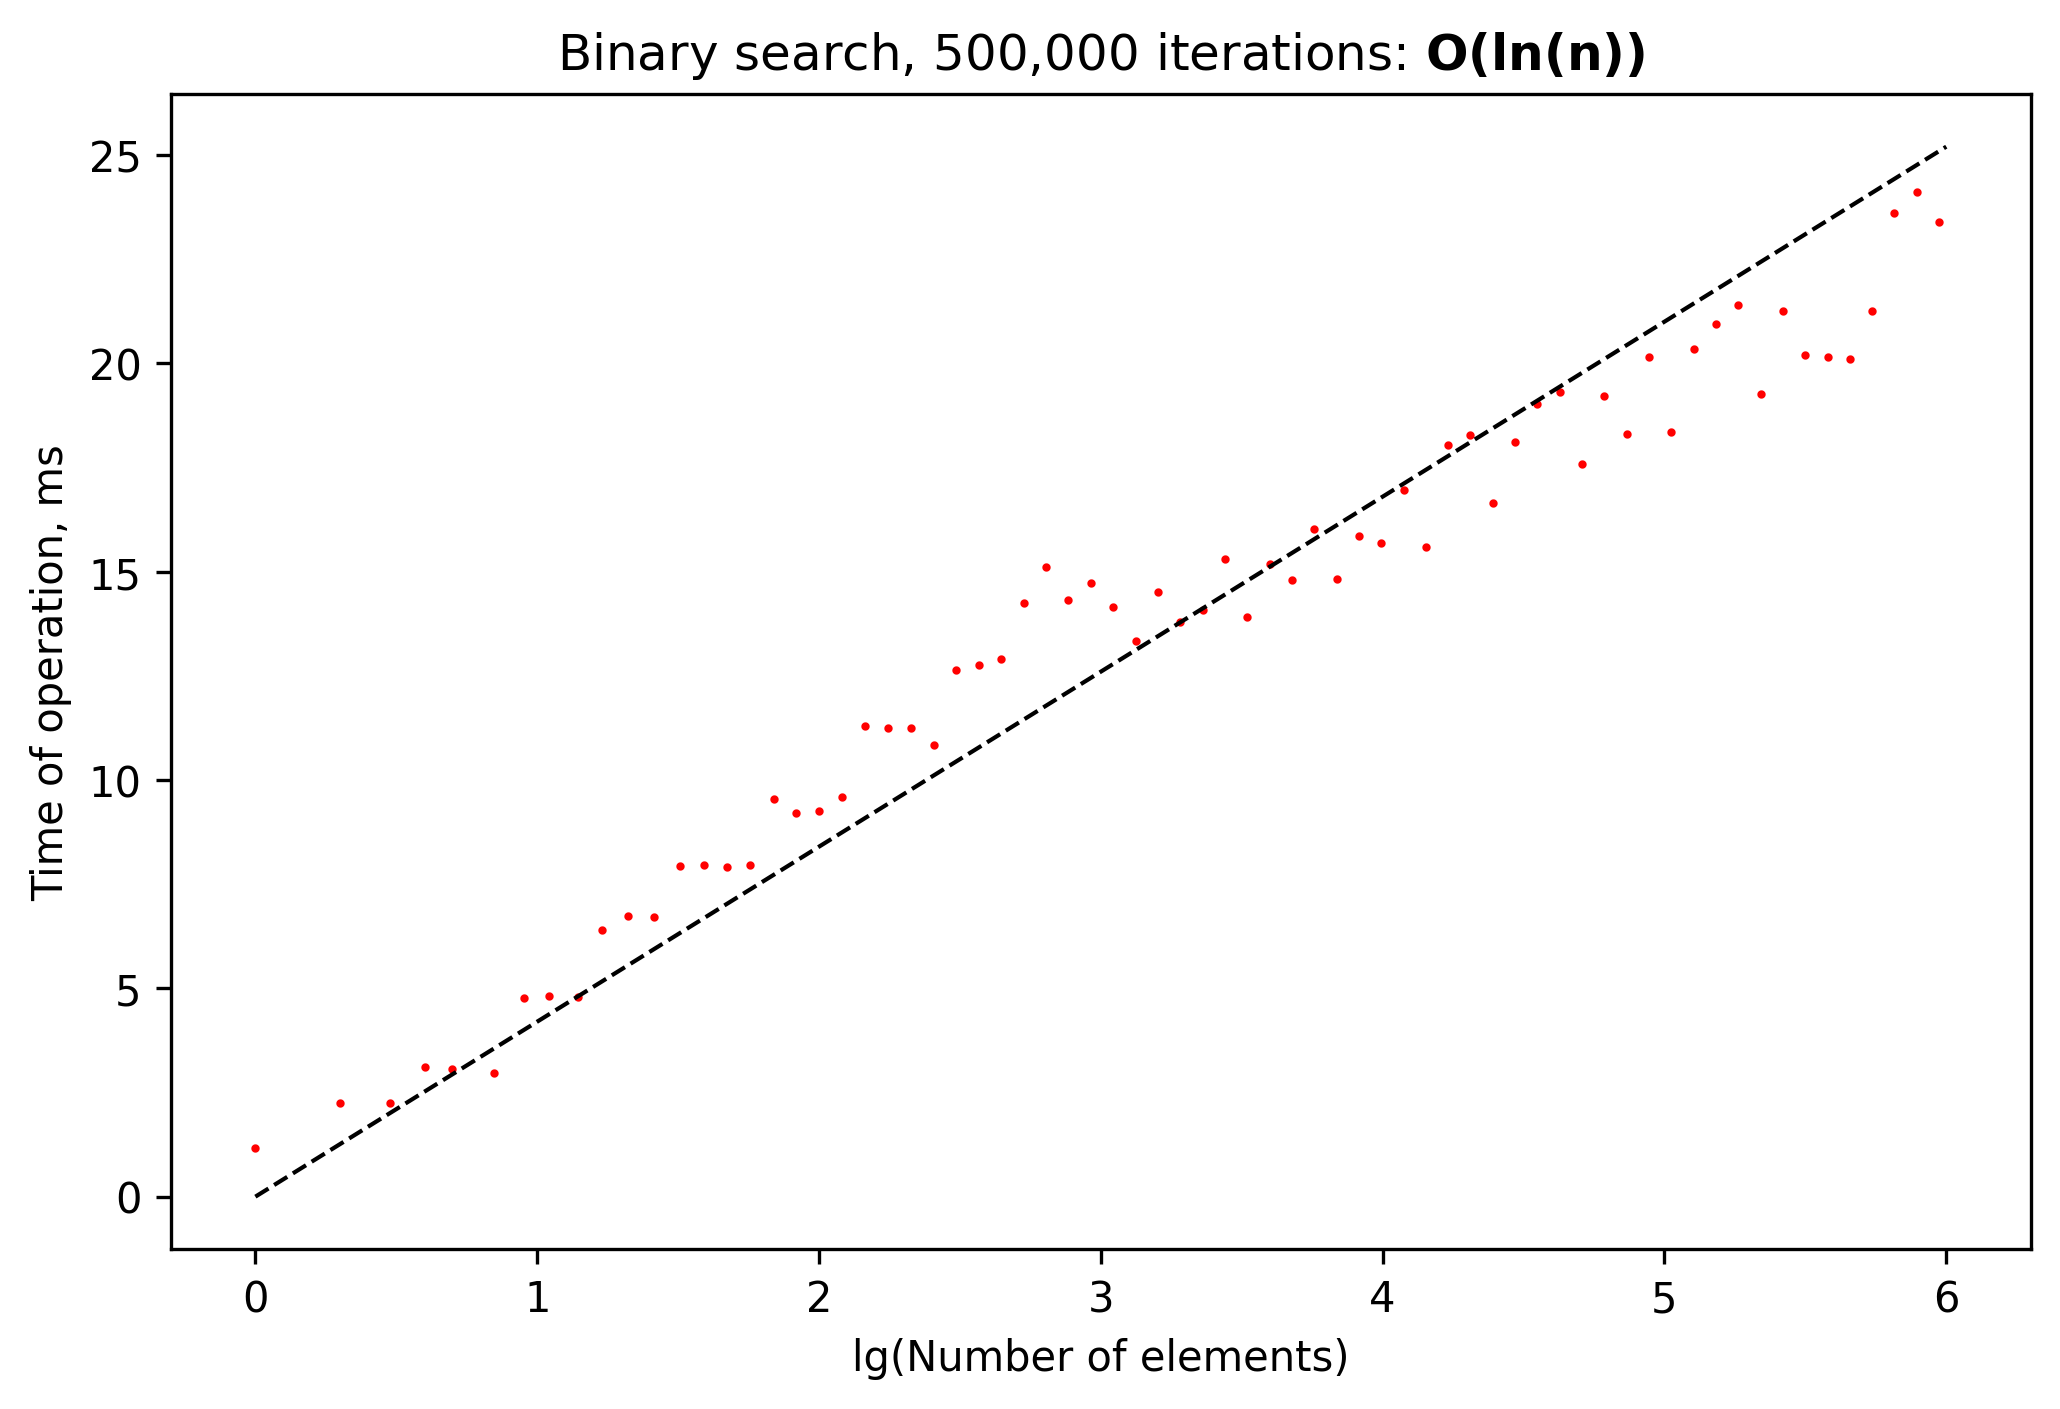

In [16]:
ls = np.linspace(0, 6, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['lnsize'], df['time']/1000, 'or', ms=1)
plt.title("Binary search, 500,000 iterations: $\mathbf{O(ln(n))}$")
k=4.2
plt.plot(ls, k*ls, '--k', lw=1)

# SUM OF TWO

In [75]:
df = pd.read_csv("sumtwo/sumtwo.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:10].median(), axis=1)

In [76]:
df= df[df.time!=0.0]
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)
df['lntime'] = df.apply(lambda x: log10(x['time']/1000), axis=1)

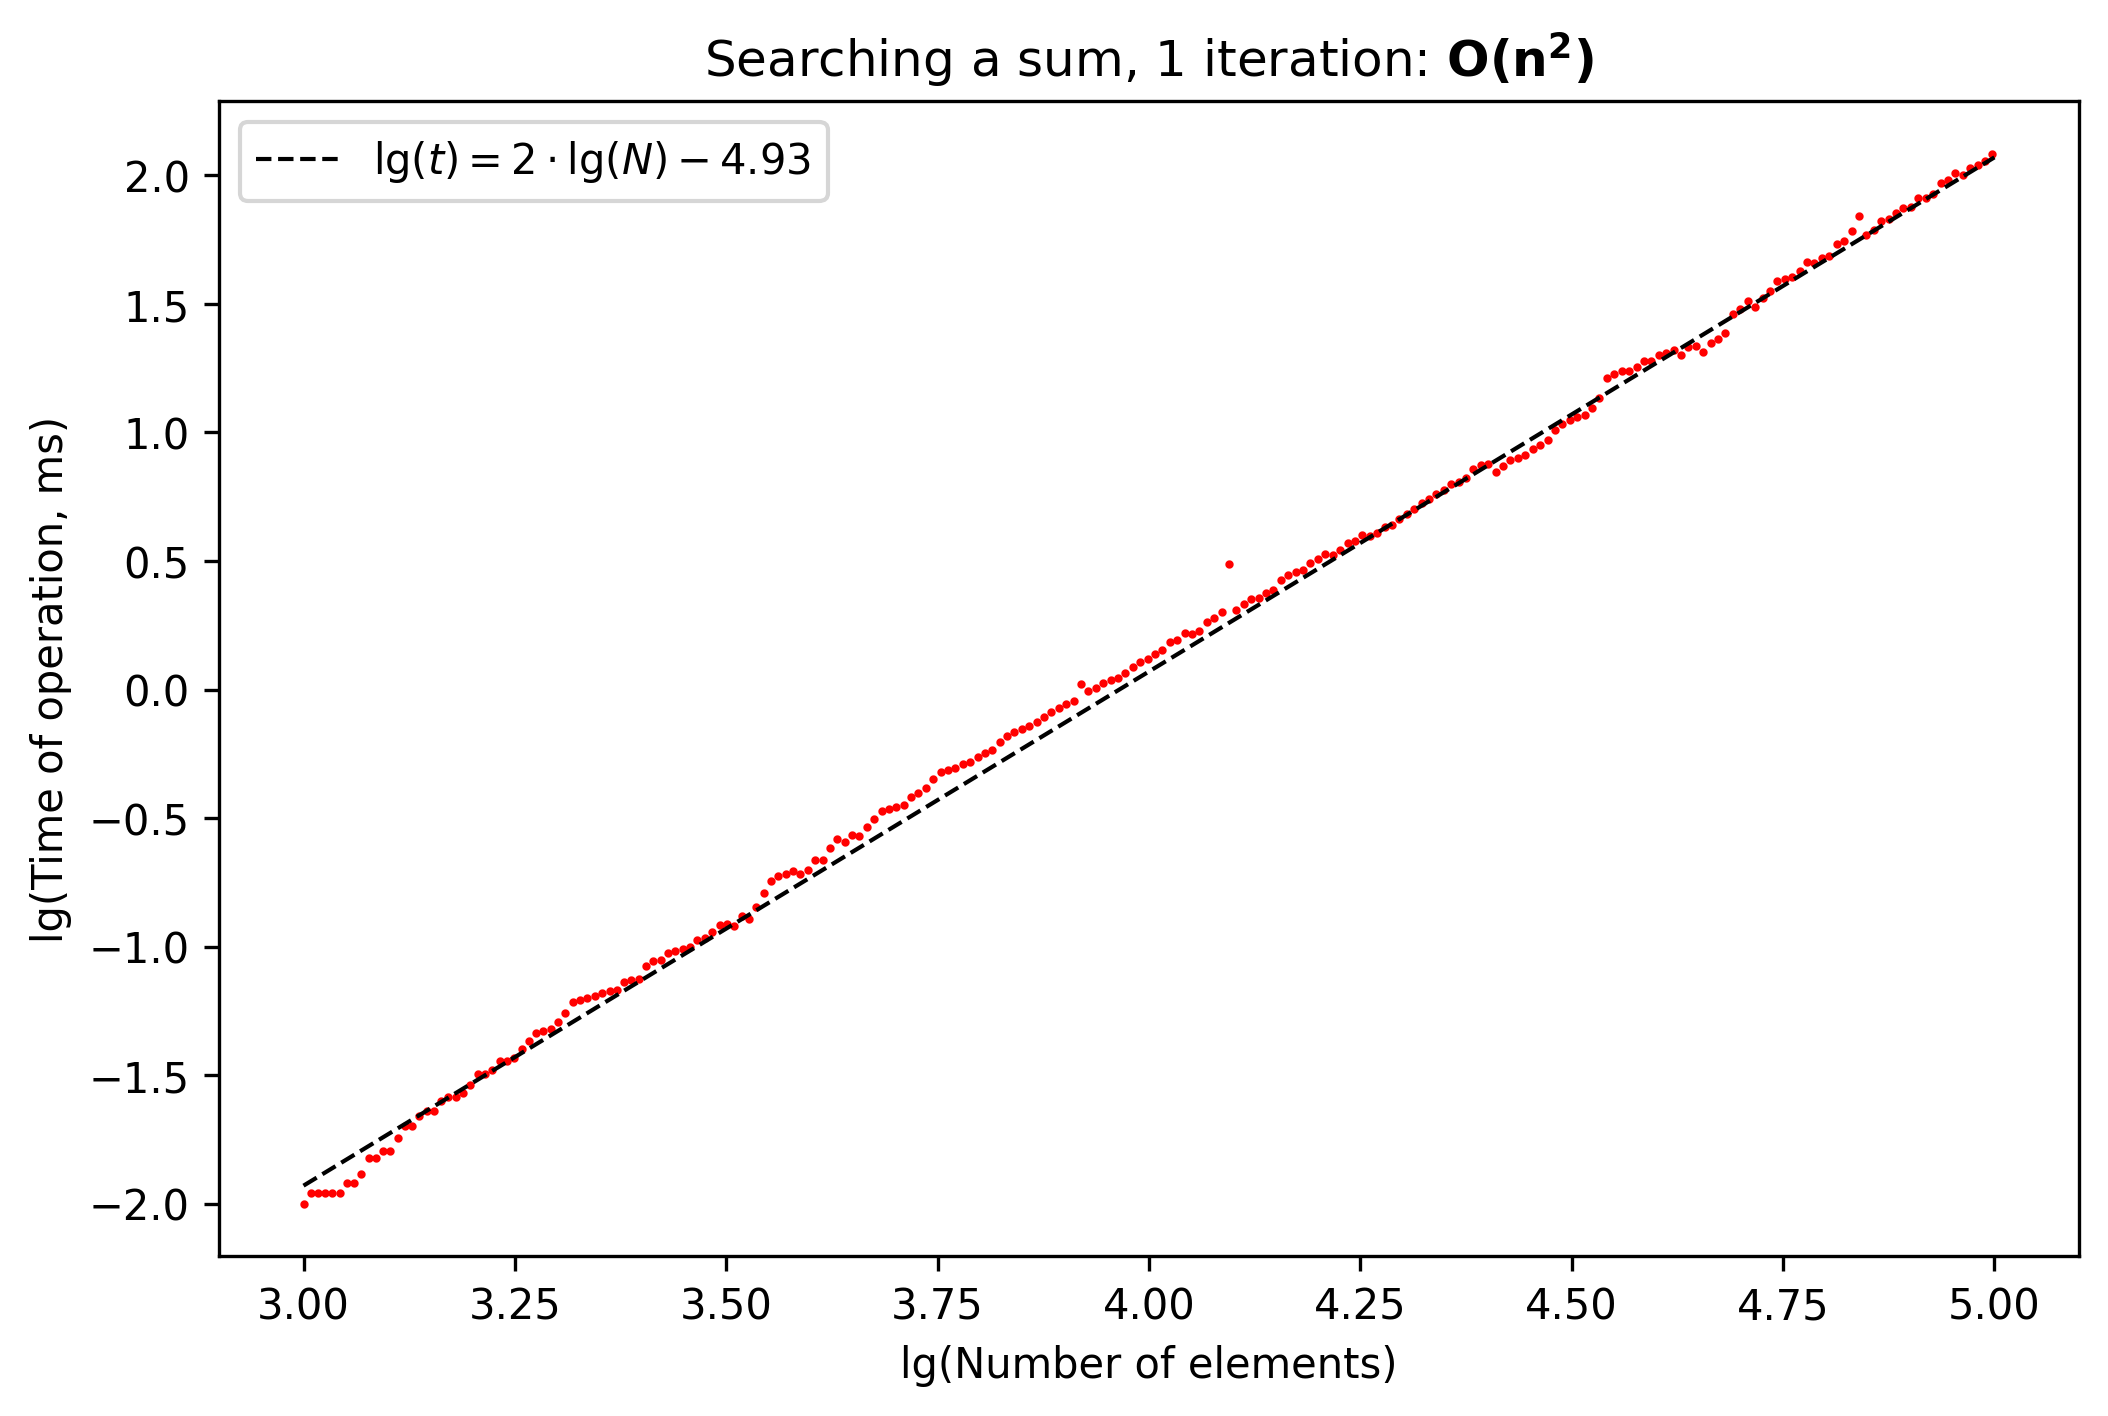

In [77]:
ls = np.linspace(3, 5, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'lg(Time of operation, ms)')
plt.plot(df['lnsize'], df['lntime'], 'or', ms=1)
plt.title("Searching a sum, 1 iteration: $\mathbf{O(n^2)}$")
k=2
b=-7.93
plt.plot(ls, k*ls+b, '--k', lw=1, label = '$\lg(t) = 2\cdot \lg(N) - 4.93$')
plt.legend()

# Sum of two [SORTED]

In [94]:
df = pd.read_csv("sumtwo-sorted/sumtwo-sorted.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:25].median(), axis=1)
df

,size,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time17,time18,time19,time20,time21,time22,time23,time24,time25,time
0,10000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,20000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,30000,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.0
3,40000,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.0
4,50000,2,1,1,1,1,3,2,1,2,...,1,1,1,1,2,2,2,2,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,960000,34,30,31,29,30,34,34,35,28,...,35,31,31,31,50,31,30,33,34,31.0
96,970000,28,29,29,35,30,35,33,28,34,...,31,34,33,51,35,32,34,33,33,32.5
97,980000,29,36,34,34,33,44,35,33,28,...,27,27,34,35,31,38,29,27,34,34.0
98,990000,46,35,29,35,35,38,27,28,27,...,29,30,29,29,28,35,34,35,27,34.0


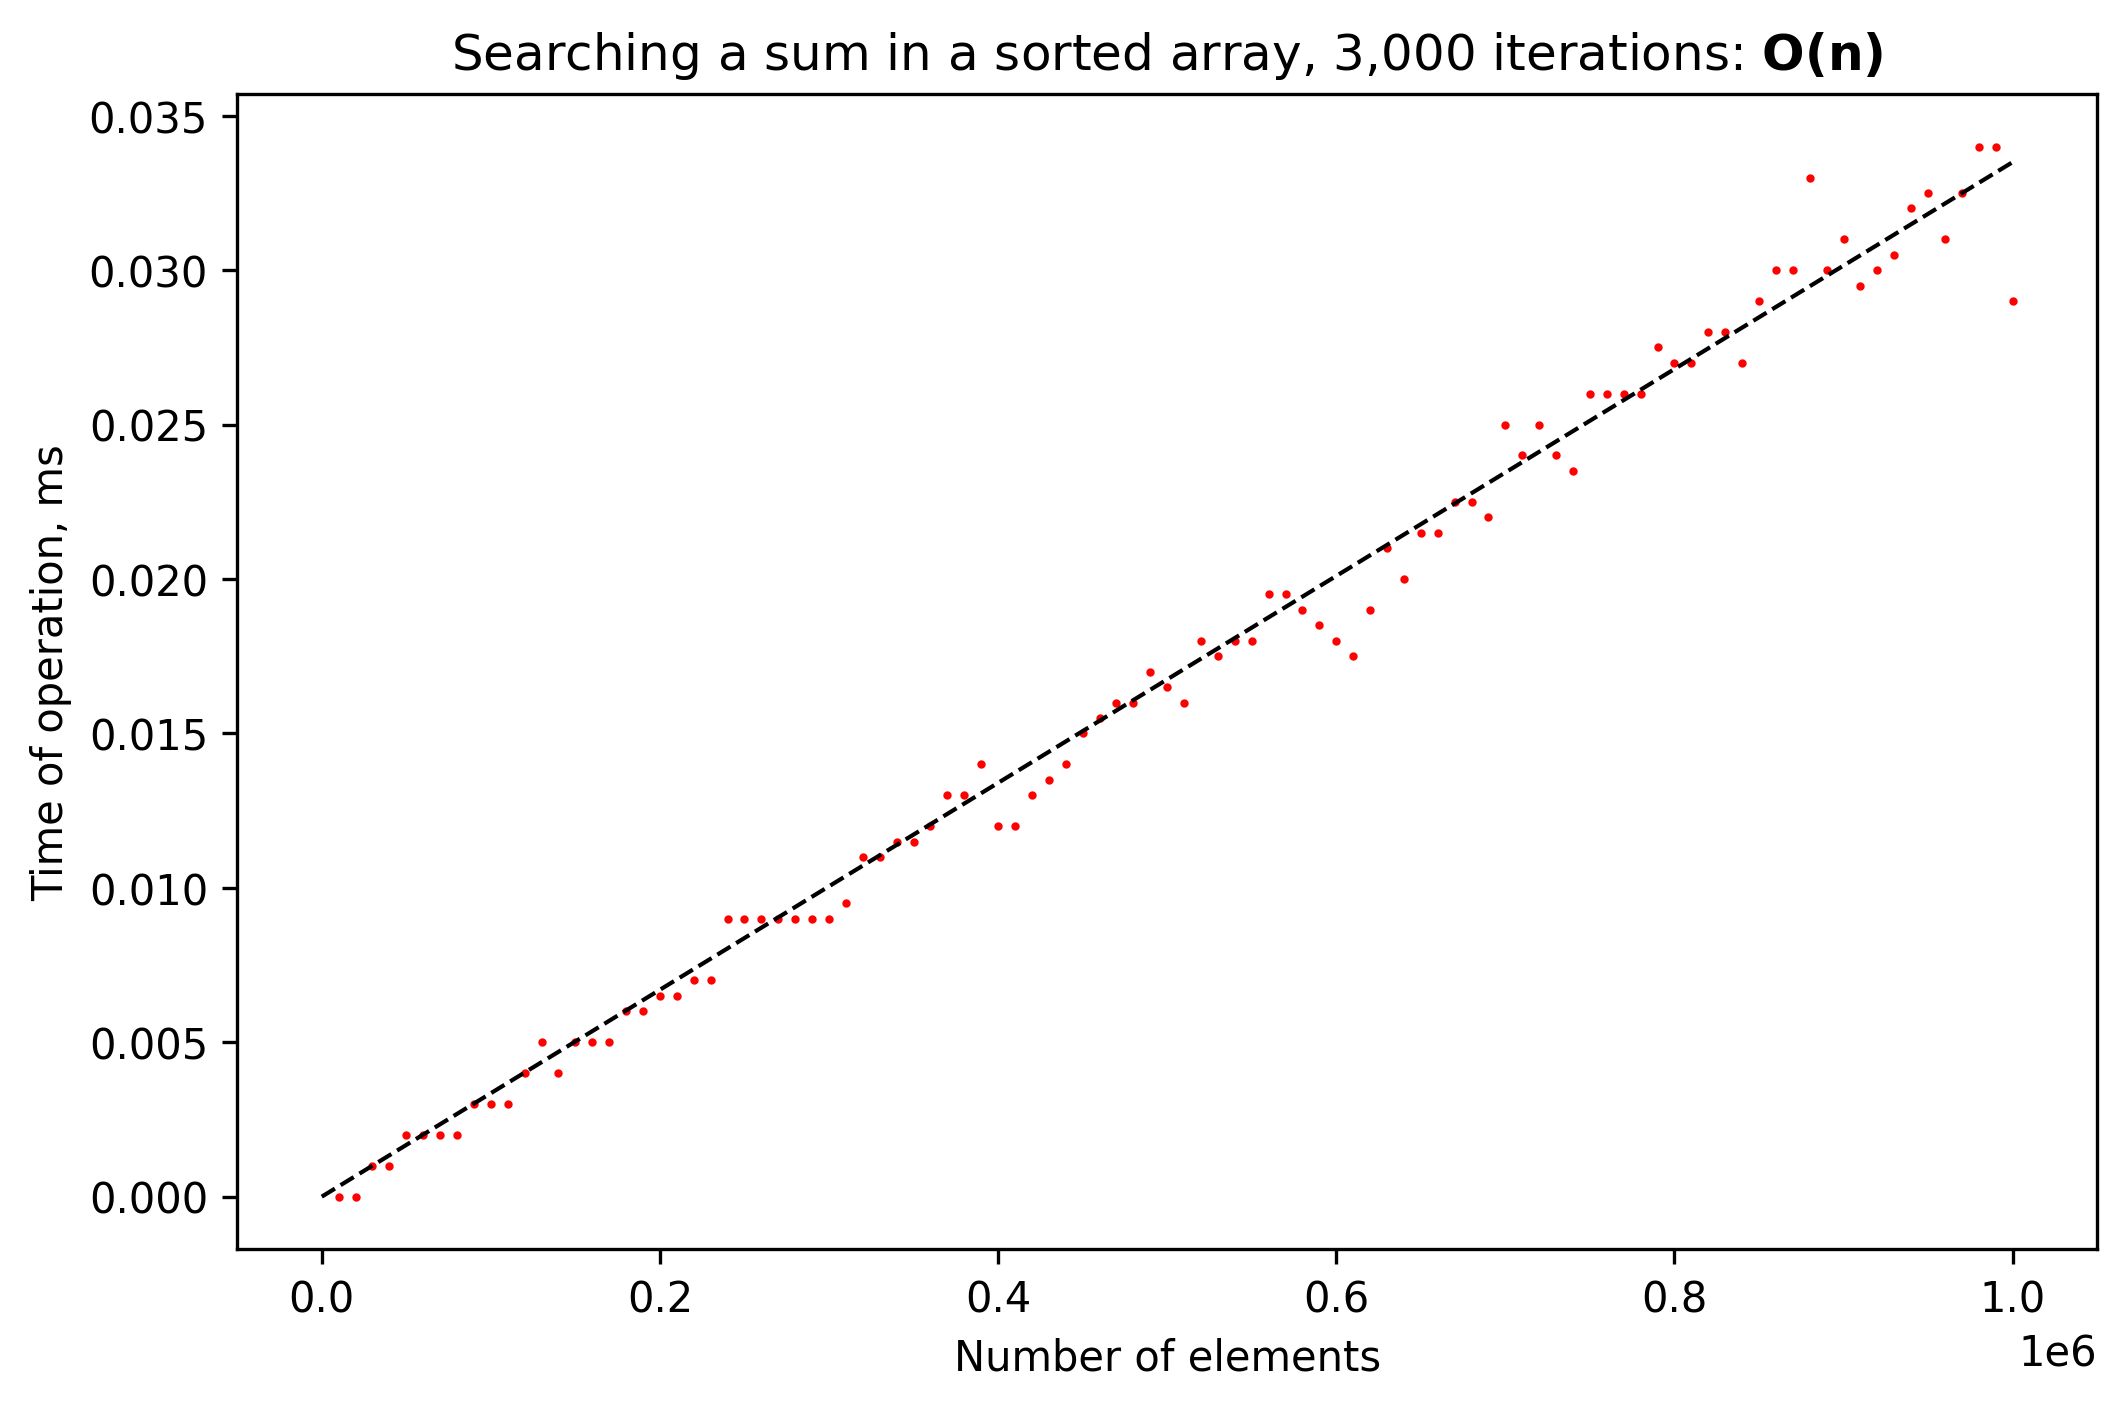

In [96]:
ls = np.linspace(0, 1000000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time']/1000, 'or', ms=1)
plt.title("Searching a sum in a sorted array, 3,000 iterations: $\mathbf{O(n)}$")
k=3.35e-8
plt.plot(ls, k*ls, '--k', lw=1)

#### 